# General Trend of Grant-in-Aid for Scientific Research (C) Adoption between 2008 and 2013

### 事前準備

In [10]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
%matplotlib inline

username= 'root'
password= 'Norika1124!'
database= 'Capstone_KAKEN'
appid = 'HhV6SqJ0yYlgkp0a887V'
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

### ここから本編

データを取得する
- New
- Duration: 2006-2015
- Category: C and B (niicode == 72 and 96)

In [17]:
sql = '''
SELECT *
FROM grantaward
LEFT OUTER JOIN master_categories USING (category_niicode)
LEFT OUTER JOIN master_sections USING (section_niicode)
LEFT OUTER JOIN master_institutions USING (institution_niicode)
WHERE grantaward.startfiscalyear BETWEEN 2006 AND 2015
AND grantaward.category_niicode = 72
'''
df = pd.read_sql_query(sql, engine)
#3.4s

In [12]:
df

,institution_niicode,section_niicode,category_niicode,awardnumber,projecttype,projectstatus_fiscalyear,projectstatus_statuscode,startfiscalyear,endfiscalyear,title_ja,...,section_table_end_date_mod,section_table_startfiscalyear,section_table_endfiscalyear,delta,institution_table_group,institution_mextcode,institution_jspscode,institution_name_ja,institution_name_en,institution_name_yomi


In [9]:
sql = '''
SELECT *
FROM grantaward2
LEFT OUTER JOIN categories USING (category_niicode)
LEFT OUTER JOIN sections USING (section_niicode)
LEFT OUTER JOIN institutions USING (institution_niicode)
WHERE grantaward2.startfiscalyear >= 2009
AND grantaward2.category_niicode = 72
'''
df = pd.read_sql_query(sql, engine)
#3.4s

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'kaken_analysis.master_categories' doesn't exist")
[SQL: 
SELECT *
FROM grantaward
LEFT OUTER JOIN master_categories USING (category_niicode)
LEFT OUTER JOIN master_sections USING (section_niicode)
LEFT OUTER JOIN master_institutions USING (institution_niicode)
WHERE grantaward.startfiscalyear BETWEEN 2006 AND 2015
AND grantaward.category_niicode = 69
AND grantaward.category_niicode = 72;
]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [3]:
df.columns
drop_lst = ['familyname','givenname', 'familyname_yomi', 'givenname_yomi', 'institution_mextcode',
       'institution_jspscode', 'institution_name_ja','institution_name_yomi','institution_mextcode', 'institution_jspscode', 'title_ja', 'title_en']
df = df.drop(drop_lst, axis =1)
df = df[df['section_name'] == "一般"]

In [4]:
df.head()

,institution_niicode,section_niicode,category_niicode,awardnumber,projecttype,projectstatus_fiscalyear,projectstatus_statuscode,startfiscalyear,endfiscalyear,directcost,...,institution_name,sequence,participate,eradcode,role,fullname,category_name,section_name,institution_table_group,institution_name_en


In [111]:
#from sqlalchemy import create_engine
#from sqlalchemy.types import String, Integer
#
#engine = create_engine(url, echo=True)
#
#df.to_sql('category_c_test', engine, if_exists='replace',
#          dtype={
#              'institution_niicode': Integer, 
#              'section_niicode':Integer,
#              'category_niicode': Integer,
#              'awardnumber': String(256),
#              'startfiscalyear': Integer,
#              'directcost': Integer,
#              'kenkyuusha_id':Integer,
#              'category_name':String(256),
#              'section_name':String(256), 
#              'institution_name':String(256)              
#                })

年度ごとの新規採択件数の推移

In [112]:
pivot = pd.crosstab([df['category_name'], df['section_name']], df['startfiscalyear'])
pivot =pivot.T

年度ごとの新規採択件数の推移を折れ線グラフで表す

Text(0, 0.5, 'Accepted Project Numbers')

/Users/norika_machome/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  func(*args, **kwargs)
/Users/norika_machome/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 33324 (\N{CJK UNIFIED IDEOGRAPH-822C}) missing from current font.
  func(*args, **kwargs)
/Users/norika_machome/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/norika_machome/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33324 (\N{CJK UNIFIED IDEOGRAPH-822C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


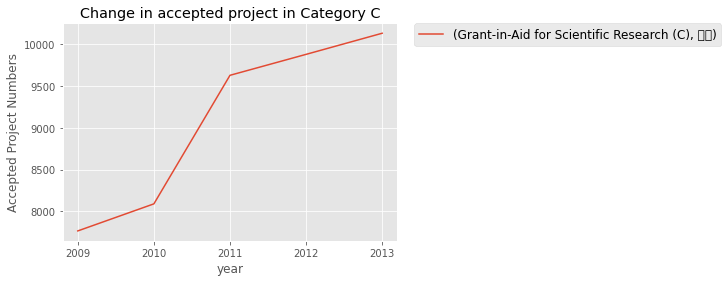

In [113]:
pivot.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

# X軸の数字が必ず整数になるようにする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.title("Change in accepted project in Category C")
plt.xlabel("year")
plt.ylabel("Accepted Project Numbers")

基盤C一般の新規採択件数は、過去10年増加傾向が続いていることがわかる。

以下は、一般区分 (section_niicode == 17) のみでみていく

In [131]:
df = df.query('section_niicode == 17')

In [115]:
df

,institution_niicode,section_niicode,category_niicode,awardnumber,projecttype,projectstatus_fiscalyear,projectstatus_statuscode,startfiscalyear,endfiscalyear,directcost,...,institution_name,sequence,participate,eradcode,role,fullname,category_name,section_name,institution_table_group,institution_name_en
0,0030110,17,72,19592530,project,2010,project_closed,2009,2010,3300000,...,北海道医療大学,1.0,None,00265092,principal_investigator,野川 道子,Grant-in-Aid for Scientific Research (C),一般,3.0,Health Sciences University of Hokkaido
1,0032612,17,72,20500341,project,2010,project_closed,2009,2011,3400000,...,慶應義塾大学,1.0,None,20365406,principal_investigator,大多 茂樹,Grant-in-Aid for Scientific Research (C),一般,3.0,Keio University
2,0014301,17,72,20520161,project,2010,project_closed,2009,2011,2200000,...,京都大学,1.0,None,60293932,principal_investigator,李 長波,Grant-in-Aid for Scientific Research (C),一般,1.0,Kyoto University
3,0035308,17,72,20520195,project,2010,project_closed,2009,2010,3400000,...,吉備国際大学,1.0,None,80278986,principal_investigator,井上 理恵,Grant-in-Aid for Scientific Research (C),一般,3.0,Kibi International University
4,0034304,17,72,20530370,project,2011,project_closed,2009,2011,2700000,...,京都産業大学,1.0,None,30258181,principal_investigator,岡部 曜子,Grant-in-Aid for Scientific Research (C),一般,3.0,Kyoto Sangyo University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45481,0033908,17,72,25518015,project,2016,project_closed,2013,2016,4000000,...,中京大学,1.0,None,50224647,principal_investigator,釜田 公良,Grant-in-Aid for Scientific Research (C),一般,3.0,Chukyo University
45482,0034310,17,72,25518016,project,2015,project_closed,2013,2015,4000000,...,同志社大学,1.0,None,90230599,principal_investigator,山谷 清志,Grant-in-Aid for Scientific Research (C),一般,3.0,Doshisha University
45483,0082656,17,72,25518017,project,2018,project_closed,2013,2018,4000000,...,公益財団法人未来工学研究所,1.0,None,20556071,principal_investigator,白川 展之,Grant-in-Aid for Scientific Research (C),一般,11.0,The Institute for Future Technology
45484,0012101,17,72,26400156,project,2017,project_closed,2013,2017,3600000,...,茨城大学,1.0,None,10451519,principal_investigator,鈴木 香奈子,Grant-in-Aid for Scientific Research (C),一般,1.0,Ibaraki University


研究機関別にみてみる。たとえば旧帝大だけにして、2018年度の件数の多い順にソートする

In [116]:
teidaicode = ["0010101", "0011301", "0012601", "0013901", "0014301", "0014401", "0017102"]
teidai = df[df['institution_niicode'].isin(teidaicode)]
teidai.head()


,institution_niicode,section_niicode,category_niicode,awardnumber,projecttype,projectstatus_fiscalyear,projectstatus_statuscode,startfiscalyear,endfiscalyear,directcost,...,institution_name,sequence,participate,eradcode,role,fullname,category_name,section_name,institution_table_group,institution_name_en
2,0014301,17,72,20520161,project,2010,project_closed,2009,2011,2200000,...,京都大学,1.0,None,60293932,principal_investigator,李 長波,Grant-in-Aid for Scientific Research (C),一般,1.0,Kyoto University
9,0011301,17,72,20550005,project,2010,project_closed,2009,2010,3900000,...,東北大学,1.0,None,70004447,principal_investigator,三上 直彦,Grant-in-Aid for Scientific Research (C),一般,1.0,Tohoku University
12,0012601,17,72,20580108,project,2010,project_closed,2009,2011,3700000,...,東京大学,1.0,None,20219091,principal_investigator,降旗 一夫,Grant-in-Aid for Scientific Research (C),一般,1.0,The University of Tokyo
19,0014401,17,72,20591983,project,2010,project_closed,2010,2010,3500000,...,大阪大学,1.0,None,80332740,principal_investigator,村田 潤子,Grant-in-Aid for Scientific Research (C),一般,1.0,Osaka University
20,0012601,17,72,20613002,project,2011,project_closed,2009,2011,3400000,...,東京大学,1.0,None,30345095,principal_investigator,中村 恒夫,Grant-in-Aid for Scientific Research (C),一般,1.0,The University of Tokyo


In [117]:
#pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
#pivot

(50.0, 300.0)

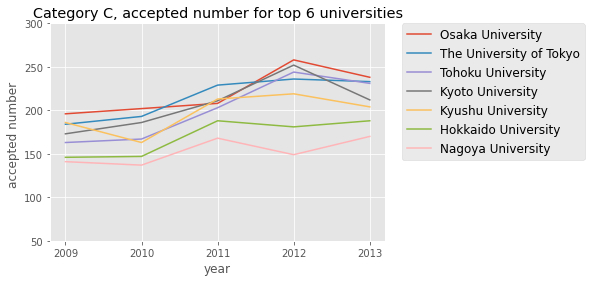

In [119]:
pivot = pd.crosstab(teidai['institution_name_en'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2013, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('Category C, accepted number for top 6 universities')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

# X軸の数字が必ず整数になるようにする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xlabel("year")
ax.set_ylabel("accepted number ")
ax.set_ylim(50,300)


旧帝大全体でみるとはだいたい増えてるけど、北大と名大はボックス圏内にいるっぽい。

旧六大学は？

In [120]:
kyuurokucode = ["0012501", "0013101", "0013301", "0015301", "0017301", "0017401"]
kyuuroku = df[df['institution_niicode'].isin(kyuurokucode)]
pivot = pd.crosstab(kyuuroku['institution_name_en'], kyuuroku['startfiscalyear'])
pivot = pivot.sort_values(2013, ascending=False)
pivot

startfiscalyear,2009,2010,2011,2012,2013
institution_name_en,,,,,
Okayama University,105,112,122,123,125
Chiba University,102,116,115,114,123
Niigata University,101,81,127,131,112
Kanazawa University,80,94,115,103,109
Kumamoto University,83,73,96,97,100
Nagasaki University,82,66,85,93,95


(0.0, 200.0)

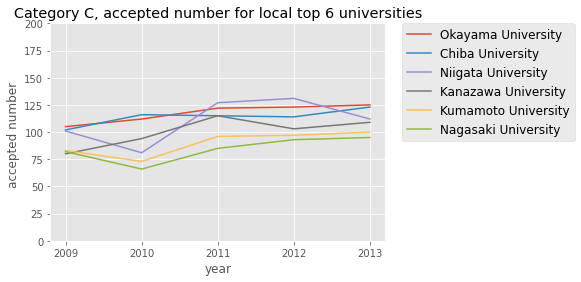

In [125]:
kyuuroku = df[df['institution_niicode'].isin(kyuurokucode)]
pivot = pd.crosstab(kyuuroku['institution_name_en'], kyuuroku['startfiscalyear'])
pivot = pivot.sort_values(2013, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('Category C, accepted number for local top 6 universities')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

# X軸の数字が必ず整数になるようにする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))

ax.set_xlabel("year")
ax.set_ylabel("accepted number ")
ax.set_ylim(0,200)

岡山が一つとびぬけている。基盤Bなど他の種目も見たり、新規＋継続件数も見たりしないと、意味のあることは言えないけど。